In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
#ignore all warning
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

#Load URL

In [43]:
url="https://books.toscrape.com/"
url

'https://books.toscrape.com/'

In [46]:
page = requests.get(url)

In [30]:
page

<Response [200]>

In [31]:
page.content

b'<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:29" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon" hre

In [32]:
page.text

'<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:29" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon" href

In [47]:
soup=BeautifulSoup(page.content,'html.parser')

In [48]:
soup.title

<title>
    All products | Books to Scrape - Sandbox
</title>

In [49]:
soup.prettify()

'<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!-->\n<html class="no-js" lang="en-us">\n <!--<![endif]-->\n <head>\n  <title>\n   All products | Books to Scrape - Sandbox\n  </title>\n  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>\n  <meta content="24th Jun 2016 09:29" name="created"/>\n  <meta content="" name="description"/>\n  <meta content="width=device-width" name="viewport"/>\n  <meta content="NOARCHIVE,NOCACHE" name="robots"/>\n  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n  <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n  <link href="static/oscar/favicon.ico" rel="shortcut icon"/>\n  <link href="static/oscar/css/styles.css" rel=

In [61]:
#extract title of all pages Page 1 of 50
current_page=1
data=[]
proceed=True
while (proceed):
    url=f"https://books.toscrape.com/catalogue/page-"+str(current_page)+".html"
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    if soup.title.text=='404 Not Found':
      proceed=False
      #print('No more pages')
    else:
      all_books=soup.find_all("li",class_="col-xs-6 col-sm-4 col-md-3 col-lg-3")
      for book in all_books:
            item = {}

            item['Title'] = book.find("img").attrs["alt"]
            #print(item['Title'])

            item['Link'] = "https://books.toscrape.com/catalogue/"+book.find("a").attrs["href"]
            #print(item['Link'])

            item['Price'] = book.find("p", class_="price_color").text[1:]
            #print(item['Price'])

            item['Stock'] = book.find("p", class_="instock availability").text.strip()
            #print(item['Stock'])

            data.append(item)

    current_page += 1

In [62]:
#save the extracted data in dataframe
df=pd.DataFrame(data)
df

,Title,Link,Price,Stock
0,A Light in the Attic,https://books.toscrape.com/catalogue/a-light-i...,51.77,In stock
1,Tipping the Velvet,https://books.toscrape.com/catalogue/tipping-t...,53.74,In stock
2,Soumission,https://books.toscrape.com/catalogue/soumissio...,50.10,In stock
3,Sharp Objects,https://books.toscrape.com/catalogue/sharp-obj...,47.82,In stock
4,Sapiens: A Brief History of Humankind,https://books.toscrape.com/catalogue/sapiens-a...,54.23,In stock
...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,https://books.toscrape.com/catalogue/alice-in-...,55.53,In stock
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",https://books.toscrape.com/catalogue/ajin-demi...,57.06,In stock
997,A Spy's Devotion (The Regency Spies of London #1),https://books.toscrape.com/catalogue/a-spys-de...,16.97,In stock
998,1st to Die (Women's Murder Club #1),https://books.toscrape.com/catalogue/1st-to-di...,53.98,In stock


In [63]:
#save in CSV file
df.to_csv('web_scrap_books.csv')

In [64]:
#save data in excel
df.to_excel('web_scrap+books.xlsx')

#check extracted file by load

In [65]:
df1=pd.read_csv('/content/web_scrap_books.csv')
df1

,Unnamed: 0,Title,Link,Price,Stock
0,0,A Light in the Attic,https://books.toscrape.com/catalogue/a-light-i...,51.77,In stock
1,1,Tipping the Velvet,https://books.toscrape.com/catalogue/tipping-t...,53.74,In stock
2,2,Soumission,https://books.toscrape.com/catalogue/soumissio...,50.10,In stock
3,3,Sharp Objects,https://books.toscrape.com/catalogue/sharp-obj...,47.82,In stock
4,4,Sapiens: A Brief History of Humankind,https://books.toscrape.com/catalogue/sapiens-a...,54.23,In stock
...,...,...,...,...,...
995,995,Alice in Wonderland (Alice's Adventures in Won...,https://books.toscrape.com/catalogue/alice-in-...,55.53,In stock
996,996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",https://books.toscrape.com/catalogue/ajin-demi...,57.06,In stock
997,997,A Spy's Devotion (The Regency Spies of London #1),https://books.toscrape.com/catalogue/a-spys-de...,16.97,In stock
998,998,1st to Die (Women's Murder Club #1),https://books.toscrape.com/catalogue/1st-to-di...,53.98,In stock


In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Title       1000 non-null   object 
 2   Link        1000 non-null   object 
 3   Price       1000 non-null   float64
 4   Stock       1000 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


In [68]:
#drop unnamed columns
df1.drop('Unnamed: 0',axis=1,inplace=True)
df1

,Title,Link,Price,Stock
0,A Light in the Attic,https://books.toscrape.com/catalogue/a-light-i...,51.77,In stock
1,Tipping the Velvet,https://books.toscrape.com/catalogue/tipping-t...,53.74,In stock
2,Soumission,https://books.toscrape.com/catalogue/soumissio...,50.10,In stock
3,Sharp Objects,https://books.toscrape.com/catalogue/sharp-obj...,47.82,In stock
4,Sapiens: A Brief History of Humankind,https://books.toscrape.com/catalogue/sapiens-a...,54.23,In stock
...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,https://books.toscrape.com/catalogue/alice-in-...,55.53,In stock
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",https://books.toscrape.com/catalogue/ajin-demi...,57.06,In stock
997,A Spy's Devotion (The Regency Spies of London #1),https://books.toscrape.com/catalogue/a-spys-de...,16.97,In stock
998,1st to Die (Women's Murder Club #1),https://books.toscrape.com/catalogue/1st-to-di...,53.98,In stock


In [77]:
#top 10 book list price wise
df1.sort_values(by='Price',ascending=False).head(10)

,Title,Link,Price,Stock
648,The Perfect Play (Play by Play #1),https://books.toscrape.com/catalogue/the-perfe...,59.99,In stock
617,Last One Home (New Beginnings #1),https://books.toscrape.com/catalogue/last-one-...,59.98,In stock
860,Civilization and Its Discontents,https://books.toscrape.com/catalogue/civilizat...,59.95,In stock
560,The Barefoot Contessa Cookbook,https://books.toscrape.com/catalogue/the-baref...,59.92,In stock
366,The Diary of a Young Girl,https://books.toscrape.com/catalogue/the-diary...,59.90,In stock
657,The Bone Hunters (Lexy Vaughan & Steven Macaul...,https://books.toscrape.com/catalogue/the-bone-...,59.71,In stock
133,Thomas Jefferson and the Tripoli Pirates: The ...,https://books.toscrape.com/catalogue/thomas-je...,59.64,In stock
387,Boar Island (Anna Pigeon #19),https://books.toscrape.com/catalogue/boar-isla...,59.48,In stock
549,The Man Who Mistook His Wife for a Hat and Oth...,https://books.toscrape.com/catalogue/the-man-w...,59.45,In stock
393,The Improbability of Love,https://books.toscrape.com/catalogue/the-impro...,59.45,In stock


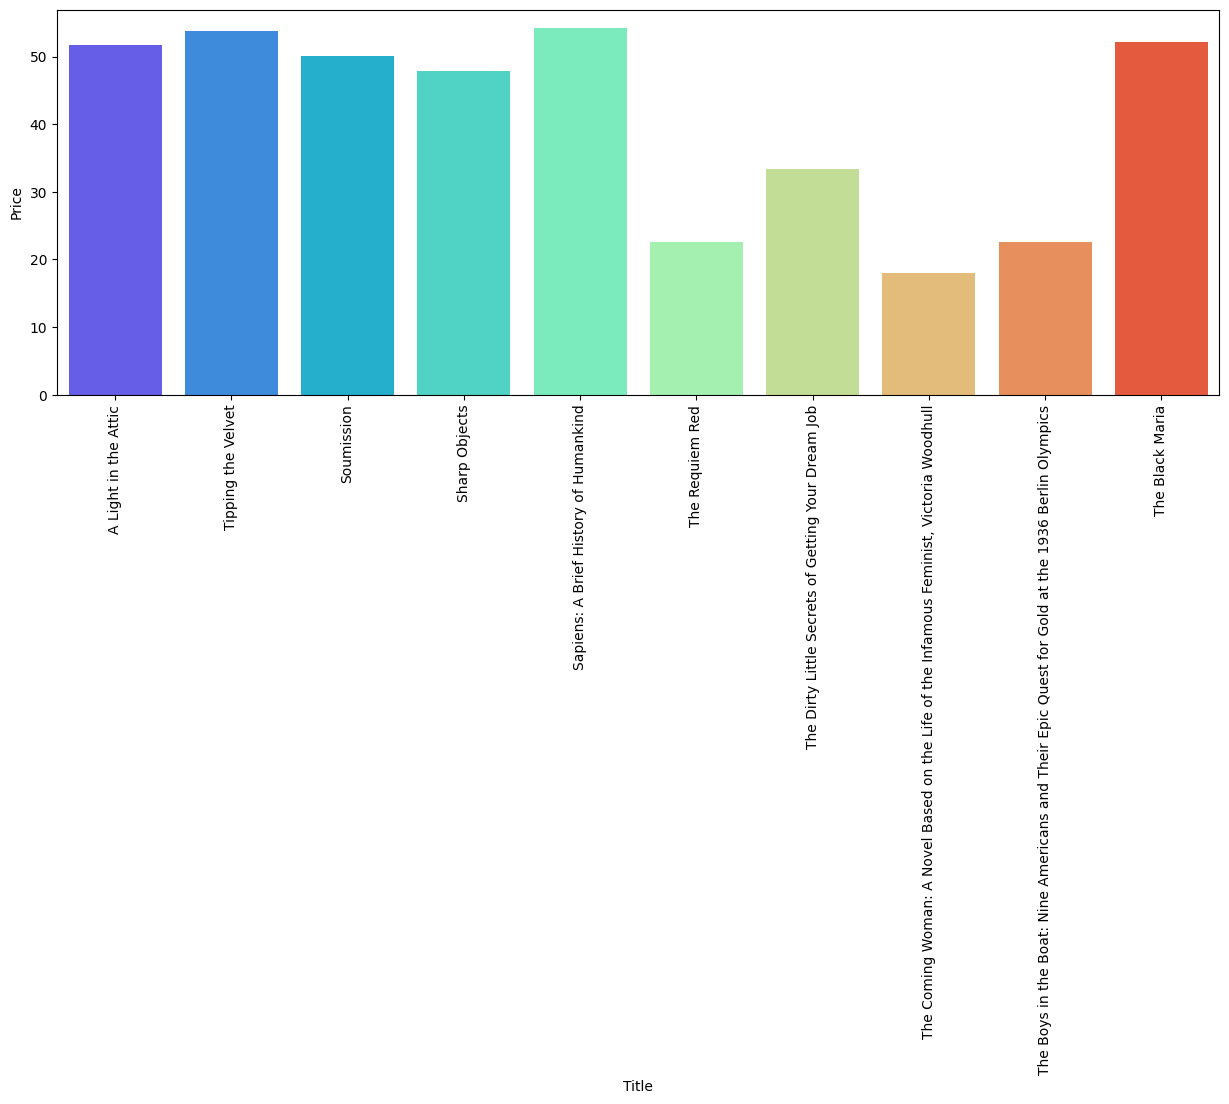

In [79]:
#barchrt on title and price
plt.figure(figsize=(15,5))
sns.barplot(x='Title',y='Price',data=df1.head(10),palette='rainbow')
plt.xticks(rotation=90)
plt.show()